In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra
import radical.entk as re 

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob
from math import sqrt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator

In [2]:
df = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution','Pre Exec Overhead'])
df_err = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution', 'Pre Exec Overhead'])

df_3s = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution','Pre Exec Overhead'])
df_3s_err = pd.DataFrame(columns=['RP overhead', 'EnTK overhead','Task Execution', 'Pre Exec Overhead'])



# hyper_4 = {'experiments':['exp1', 'exp2']}
# hyper_5 = {'experiments':['exp3', 'exp4']}
# hyper_6 = {'experiments':['exp5', 'exp6']}
# hyper_7 = {'experiments':['exp7', 'exp8']}

trials = 4

re_folder = []
rp_folder = []

rp_data = []
entk_data = []
exec_data = []


hyper_2_list_entk = list()
hyper_2_list_rp = list()
hyper_2_list_exec = list()
hyper_2_list_staging = list()


hyper_2_3s_list_entk = list()
hyper_2_3s_list_rp = list()
hyper_2_3s_list_exec = list()
hyper_2_3s_list_staging = list()

In [3]:
re_folder = glob.glob('../gbm_workload/hyperspace_run_1/re.session.two.jdakka.017821.0002')
rp_folder = glob.glob('../gbm_workload/hyperspace_run_1/rp.session.two.jdakka.017821.0002')

rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

# LRMS_running = PMGR_Active -> DONE 
# pilot_duration = rp_pilots.duration([rp.PMGR_ACTIVE, rp.FINAL])
# print pilot_duration
# rp_data.append(pilot_duration)
# units

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017821.0002', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])



entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])


hyper_2_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_list_rp.append(rp_dur)
hyper_2_list_entk.append(entk_dur)
hyper_2_list_staging.append(staging_dur)

rp_folder = glob.glob('../gbm_workload/hyperspace_run_2/rp.session.two.jdakka.017821.0007')
re_folder = glob.glob('../gbm_workload/hyperspace_run_2/re.session.two.jdakka.017821.0007')

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017821.0007', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])


hyper_2_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_list_rp.append(rp_dur)
hyper_2_list_entk.append(entk_dur)
hyper_2_list_staging.append(staging_dur)


rp_folder = glob.glob('../gbm_workload/hyperspace_run_3/rp.session.two.jdakka.017834.0002')
re_folder = glob.glob('../gbm_workload/hyperspace_run_3/re.session.two.jdakka.017834.0002')

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017834.0002', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])

rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])

hyper_2_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_list_rp.append(rp_dur)
hyper_2_list_entk.append(entk_dur)
hyper_2_list_staging.append(staging_dur)

rp_folder = glob.glob('../gbm_workload/hyperspace_run_4/rp.session.two.jdakka.017834.0001')
re_folder = glob.glob('../gbm_workload/hyperspace_run_4/re.session.two.jdakka.017834.0001')

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017834.0001', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])

hyper_2_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_list_rp.append(rp_dur)
hyper_2_list_entk.append(entk_dur)
hyper_2_list_staging.append(staging_dur)

hyper_2_list_rp_mean = sum(hyper_2_list_rp)/len(hyper_2_list_rp)
hyper_2_list_exec_mean = sum(hyper_2_list_exec)/len(hyper_2_list_exec)

hyper_2_list_entk_mean = sum(hyper_2_list_entk)/len(hyper_2_list_entk)



df.at[1, 'RP overhead'] = hyper_2_list_rp_mean
df.at[1, 'EnTK overhead'] = hyper_2_list_entk_mean
df.at[1, 'Task Execution'] = hyper_2_list_exec_mean


df_err.at[1, 'RP overhead'] = np.std(hyper_2_list_rp)/sqrt(2)
df_err.at[1,'EnTK overhead'] = np.std(hyper_2_list_entk)/sqrt(2)
df_err.at[1, 'Task Execution'] = np.std(hyper_2_list_exec)/sqrt(2)

df


,RP overhead,EnTK overhead,Task Execution,Pre Exec Overhead
1,6.4475,1.5207,618.25,NaN


In [4]:
re_folder = glob.glob('../gbm_workload_3s/3-stage-run-1/re.session.two.jdakka.017837.0003')
rp_folder = glob.glob('../gbm_workload_3s/3-stage-run-1/rp.session.two.jdakka.017837.0003')

rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)


re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017837.0003', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])



entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])


hyper_2_3s_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_3s_list_rp.append(rp_dur)
hyper_2_3s_list_entk.append(entk_dur)
hyper_2_3s_list_staging.append(staging_dur)

rp_folder = glob.glob('../gbm_workload_3s/3-stage-run-2/rp.session.two.jdakka.017837.0002')
re_folder = glob.glob('../gbm_workload_3s/3-stage-run-2/re.session.two.jdakka.017837.0002')

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017837.0002', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])


rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])


hyper_2_3s_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_3s_list_rp.append(rp_dur)
hyper_2_3s_list_entk.append(entk_dur)
hyper_2_3s_list_staging.append(staging_dur)


rp_folder = glob.glob('../gbm_workload_3s/3-stage-run-3/rp.session.two.jdakka.017837.0001')
re_folder = glob.glob('../gbm_workload_3s/3-stage-run-3/re.session.two.jdakka.017837.0001')

re_session = ra.Session(src = os.path.dirname(re_folder[0]), sid = 're.session.two.jdakka.017837.0001', stype = 'radical.entk')
tasks = re_session.filter(etype='task', inplace=False)
entk_dur = tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.SCHEDULING},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.SUBMITTED}])

entk_dur = entk_dur + tasks.duration(event=[{ru.EVENT: 'state',
                                    ru.STATE: re.states.COMPLETED},
                                    {ru.EVENT: 'state',
                                    ru.STATE: re.states.DONE}])

rp_session = ra.Session(stype='radical.pilot', src=rp_folder[0])
rp_pilots = rp_session.get(etype='pilot') 
rp_pilots = rp_session.filter(etype='pilot', inplace=False)

rp_units = rp_session.filter(etype='unit', inplace=False)
rp_dur = rp_units.duration([rp.NEW, rp.DONE])
exec_dur = rp_units.duration(event=[{ru.EVENT: 'cu_exec_start'}, {ru.EVENT: 'cu_exec_stop'}])
staging_dur = rp_units.duration(event=[{ru.EVENT: 'cu_pre_start'}, {ru.EVENT: 'cu_pre_stop'}])

hyper_2_3s_list_exec.append(exec_dur)
rp_dur = rp_dur - exec_dur
hyper_2_3s_list_rp.append(rp_dur)
hyper_2_3s_list_entk.append(entk_dur)
hyper_2_3s_list_staging.append(staging_dur)


hyper_2_3s_list_rp_mean = sum(hyper_2_3s_list_rp)/len(hyper_2_3s_list_rp)
hyper_2_3s_list_exec_mean = sum(hyper_2_3s_list_exec)/len(hyper_2_3s_list_exec)

hyper_2_3s_list_entk_mean = sum(hyper_2_list_entk)/len(hyper_2_3s_list_entk)



df.at[3, 'RP overhead'] = hyper_2_3s_list_rp_mean
df.at[3, 'EnTK overhead'] = hyper_2_3s_list_entk_mean
df.at[3, 'Task Execution'] = hyper_2_3s_list_exec_mean


df_err.at[3, 'RP overhead'] = np.std(hyper_2_3s_list_rp)/sqrt(2)
df_err.at[3,'EnTK overhead'] = np.std(hyper_2_3s_list_entk)/sqrt(2)
df_err.at[3, 'Task Execution'] = np.std(hyper_2_3s_list_exec)/sqrt(2)

df

,RP overhead,EnTK overhead,Task Execution,Pre Exec Overhead
1,6.4475,1.5207,618.25,NaN
3,16.6839,2.0276,1161.16,NaN


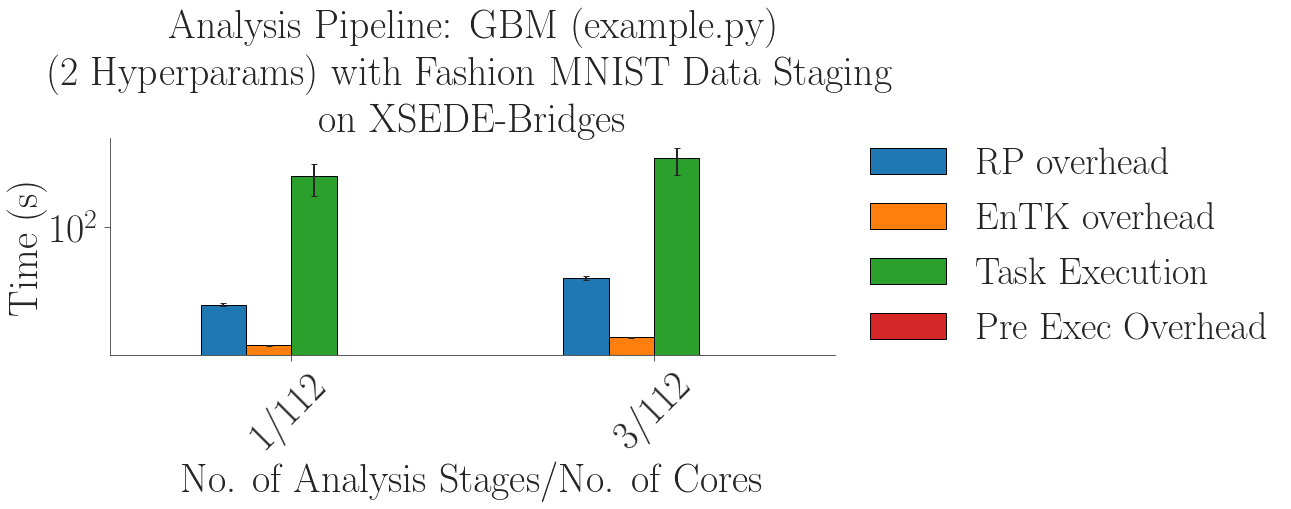

In [8]:
fig, ax = fig_setup(figsize=(13,4))
FONTSIZE = 20 
width=0.5
ax = df.plot(kind='bar',
             ax = ax,
             width = width,
             yerr = df_err,
             logy = True,
             rot=45,
             )


plt.xticks(np.arange(2), ('1/112', '3/112'))
ax.set_title('Analysis Pipeline: GBM (example.py) \n (2 Hyperparams) with Fashion MNIST Data Staging \n on XSEDE-Bridges')
ax.set_xlabel('No. of Analysis Stages/No. of Cores')
ax.set_ylabel('Time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('figures/gbm-space2-1s-3s-example.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/gbm-space2-1s-3s-example.png', dpi=300, bbox_inches='tight')